In [2]:
from AdvancedAnalytics import DecisionTree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from AdvancedAnalytics import ReplaceImputeEncode
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math

df = pd.read_excel("OilProduction.xlsx")

# Data map
attribute_map = {
    'Log_Cum_Production': ['I', (8.2986, 14.8829)] ,
    'Log_Proppant_LB': ['I', (5.8099, 18.489)] ,
    'Log_Carbonate': ['I', (-4.4818, 4.2774)] ,
    'Log_Frac_Fluid_GL': ['I', (7.324, 18.2703)] ,
    'Log_GrossPerforatedInterval': ['I', (4.1052, 9.2948)] ,
    'Log_LowerPerforation_xy': ['I', (8.0092, 10.1187)] ,
    'Log_UpperPerforation_xy': ['I', (7.6803, 9.8801)] ,
    'Log_TotalDepth': ['I', (8.0755, 10.1387)] ,
    'N_Stages': ['I', (1.5, 14.5)] ,
    'X_Well': ['I', (-99.0066, -96.5224)] ,
    'Y_Well': ['I', (31.3825, 33.9047)] ,
    'Operator': ['Z', (1, 28)] ,
    'County': ['N', (1,2,3,4,5,6,7,8,9,10,11,12,13,14)] }

# Data preprocessing
rie = ReplaceImputeEncode(data_map=attribute_map, interval_scale='std', drop=False, display=True)
encoded_df = rie.fit_transform(df)
varlist = ['Log_Cum_Production']
X = encoded_df.drop(varlist, axis=1)
y = encoded_df[varlist]
np_y = np.ravel(y) 
col = rie.col
col.remove('Log_Cum_Production')


********** Data Preprocessing ***********
Features Dictionary Contains:
11 Interval, 
0 Binary, 
1 Nominal, and 
1 Excluded Attribute(s).

Data contains 4752 observations & 13 columns.


Attribute Counts
.................................. Missing  Outliers
Log_Cum_Production...........         0         0
Log_Proppant_LB..............         0         0
Log_Carbonate................         0         0
Log_Frac_Fluid_GL............         0         0
Log_GrossPerforatedInterval..         0         0
Log_LowerPerforation_xy......         0         0
Log_UpperPerforation_xy......         0         0
Log_TotalDepth...............         0         0
N_Stages.....................         0         0
X_Well.......................         0         0
Y_Well.......................         0         0
Operator.....................         0         0
County.......................         0         0



Max_Depth:  3
Metric.......  Mean    Std. Dev.
MSE.......... 0.6365    0.0389
MAE.......... 0.6112    0.0166

Max_Depth:  4
Metric.......  Mean    Std. Dev.
MSE.......... 0.6046    0.0338
MAE.......... 0.5923    0.0140

Max_Depth:  5
Metric.......  Mean    Std. Dev.
MSE.......... 0.5838    0.0408
MAE.......... 0.5774    0.0162

Max_Depth:  6
Metric.......  Mean    Std. Dev.
MSE.......... 0.5812    0.0316
MAE.......... 0.5742    0.0161

Max_Depth:  7
Metric.......  Mean    Std. Dev.
MSE.......... 0.5864    0.0369
MAE.......... 0.5690    0.0161

Max_Depth:  8
Metric.......  Mean    Std. Dev.
MSE.......... 0.6250    0.0371
MAE.......... 0.5836    0.0166

Max_Depth:  9
Metric.......  Mean    Std. Dev.
MSE.......... 0.6733    0.0567
MAE.......... 0.5948    0.0220

Max_Depth:  10
Metric.......  Mean    Std. Dev.
MSE.......... 0.7007    0.0558
MAE.......... 0.6062    0.0215

Max_Depth:  11
Metric.......  Mean    Std. Dev.
MSE.......... 0.7552    0.0906
MAE.......... 0.6214    0.0240

Max_Dep

<Figure size 432x288 with 0 Axes>

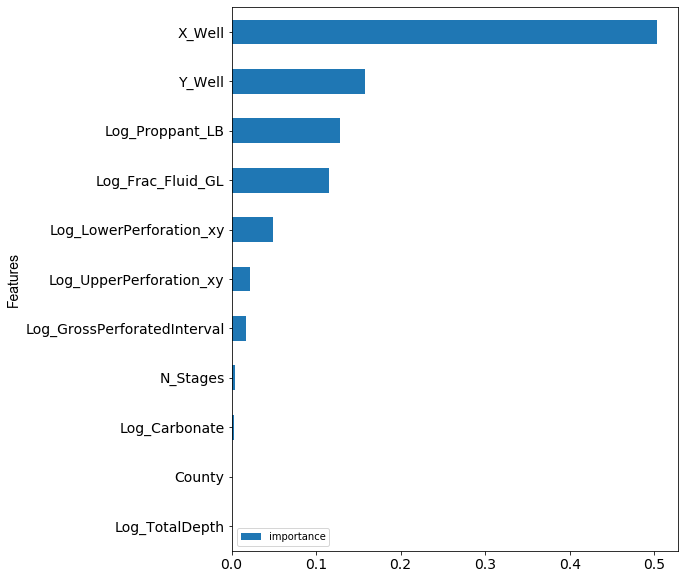

<Figure size 432x288 with 0 Axes>

In [3]:
max_depth_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
score_list = ['neg_mean_squared_error', 'neg_mean_absolute_error']
score_names = ['MSE', 'MAE']
min_mse = 1e64
for d in max_depth_list:
    print("\nMax_Depth: ", d)
    dtr = DecisionTreeRegressor(max_depth=d)
    dtr = dtr.fit(X, np_y)
    scores = cross_validate(dtr, X, np_y, scoring=score_list, \
    return_train_score=False, cv=4)
    print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
    i=0
    for s in score_list:
        var = "test_"+s
        mean = math.fabs(scores[var].mean())
        std = scores[var].std()
        label = score_names[i]
        i += 1
        print("{:.<13s}{:>7.4f}{:>10.4f}".format(label, mean, std))
        if label == 'MSE' and mean < min_mse:
            min_mse = mean
            best_depth = d
print("Best Depth (trees) = ", best_depth)

# Hold out validation
X_train, X_validate, y_train, y_validate = train_test_split(X, np_y,test_size = 0.3, random_state=12345)
dtr = DecisionTreeRegressor(max_depth=best_depth)
dtr = dtr.fit(X_train, y_train)
DecisionTree.display_split_metrics(dtr, X_train, y_train, X_validate, y_validate)
DecisionTree.display_importance(dtr, col, plot=True)

In [4]:
# Random Forest
rfr = RandomForestRegressor(n_estimators=10, criterion='mse', random_state=12345)
rfr = rfr.fit(X, np_y)
DecisionTree.display_metrics(rfr, X, np_y)
DecisionTree.display_importance(rfr, col)


Model Metrics
Observations...........     4752
Split Criterion........      mse
Max Depth..............     None
Minimum Split Size.....        2
Minimum Leaf  Size.....        1
R-Squared..............   0.9104
Mean Absolute Error....   0.2108
Median Absolute Error..   0.1486
Avg Squared Error......   0.0896
Square Root ASE........   0.2994

FEATURE........................ IMPORTANCE
X_Well.........................   0.3366
Y_Well.........................   0.1490
Log_Frac_Fluid_GL..............   0.1343
Log_Proppant_LB................   0.0966
Log_LowerPerforation_xy........   0.0764
Log_UpperPerforation_xy........   0.0495
Log_GrossPerforatedInterval....   0.0426
Log_Carbonate..................   0.0422
Log_TotalDepth.................   0.0368
N_Stages.......................   0.0241
County.........................   0.0119



Random Forest is better than tree as the ASE is much lower than tree.